# Treinamento e Análise

In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.listdir('../01_Desenvolvimento_extracao/')
# ..= voltar 1 pasta
# . = daqui pra cá

['.ipynb_checkpoints',
 'Start_Game_v2.ipynb',
 'Start_Game_v0.ipynb',
 'Start_Game_v1.ipynb',
 'dados.pkl']

In [3]:
df = pd.read_pickle('../01_Desenvolvimento_extracao/dados.pkl')

In [4]:
df.tail()

,1,2,3,4,5,6,7,8,9,resultado
39995,5,1,6,4,0.5,8,3,7,2,1.0
39996,0.5,2,1,3,4,5,7,8,6,1.0
39997,8,2,6,5,1,4,3,7,0.5,1.0
39998,6,5,8,4,2,7,1,9,3,0.0
39999,8,7,5,9,6,2,1,4,3,0.5


In [5]:
# Remover dados duplicados + resertar indice + dropar coluna index
#df = df.drop_duplicates().reset_index().drop('index',axis=1)
df.tail()

,1,2,3,4,5,6,7,8,9,resultado
39995,5,1,6,4,0.5,8,3,7,2,1.0
39996,0.5,2,1,3,4,5,7,8,6,1.0
39997,8,2,6,5,1,4,3,7,0.5,1.0
39998,6,5,8,4,2,7,1,9,3,0.0
39999,8,7,5,9,6,2,1,4,3,0.5


# Separação dos dados

In [6]:
x = df.drop('resultado',axis=1)
y = df[['resultado']]

x.shape,y.shape

((40000, 9), (40000, 1))

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.1,
)

In [9]:
# RESETAR OS índices, para igualar os valores corretos de X e Y
x_train.reset_index().drop('index',axis=1)
y_train.reset_index().drop('index',axis=1)

x_test.reset_index().drop('index',axis=1)
y_test.reset_index().drop('index',axis=1)


# não sei porquê, tive que fazer essa conversão para
# o modelo ser aceito... nunca aconteceu isso antes
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [10]:
import tensorflow as tf

In [11]:
x_train.shape

(36000, 9)

In [34]:
y_train.shape

(36000, 1)

In [12]:
x_train.shape[1]

9

### Create your model

In [13]:
# PODER FAZER LOAD em vez de criar novamente...


model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = 'relu',
    input_shape = (x_train.shape[1],)
))


model.add(tf.keras.layers.Dense(
    units = 20,
    activation = 'relu',
))

model.add(tf.keras.layers.Dropout(0.1))





model.add(tf.keras.layers.Dense(
    units = 30,
    activation = 'relu',
))

"""
model.add(tf.keras.layers.Dense(
    units = 50,
    activation = 'relu',
))

model.add(tf.keras.layers.Dense(
    units = 40,
    activation = 'relu',
    
))

model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(
    units = 40,
    activation = 'relu',
    
))

model.add(tf.keras.layers.Dense(
    units = 20,
    activation = 'relu',
    
))

"""
model.add(tf.keras.layers.Dense(
    units = 1,
    activation = 'sigmoid',
))

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 981
Trainable params: 981
Non-trainable params: 0
_________________________________________________________________


### Save <span style="color:blue">MODEL</span>

In [14]:
#model.save('./save_model/model.h5')

### LOAD <span style="color:red">MODEL</span> (Pode fazer load em vez de criar)

In [15]:
model = tf.keras.models.load_model('./save_model/model.h5')

### LOAD <span style="color:red">WEIGHT</span>

In [16]:
model.load_weights('./save_weight/weight.h5')

### Calcular os pesos da rede (Se fizer o Load, não precisa)

In [17]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.1,
    epochs = 10,
    verbose = 0,# Não printar
)

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

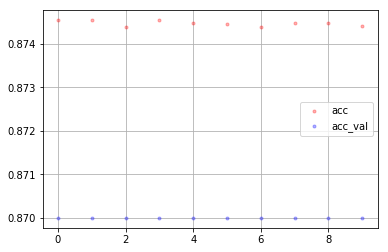

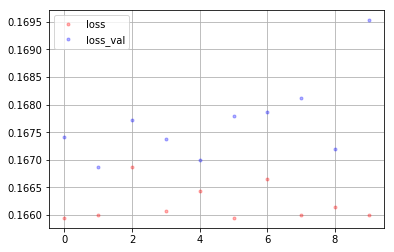

In [18]:
plt.figure()
plt.plot(history.history['accuracy'],'.r', label = 'acc',alpha = 0.3)
plt.plot(history.history['val_accuracy'], '.b', label = 'acc_val',alpha = 0.3)
plt.legend()
plt.grid()

plt.figure()
plt.plot(history.history['loss'],'.r', label = 'loss',alpha = 0.3)
plt.plot(history.history['val_loss'],'.b', label = 'loss_val',alpha = 0.3)
plt.legend()
plt.grid()

# Predicts

In [19]:
pred = model.predict(x_test)

In [20]:
pred_df = pd.DataFrame()
pred_df['pred'] = pred[:,0]
pred_df['y'] = y_test

In [21]:
pred_df.head()

,pred,y
0,0.000068,0.0
1,1.000000,1.0
2,0.000000,0.0
3,0.000013,0.0
4,1.000000,1.0


In [22]:
def f(x):
    val = x[0]
    if val >= 0.75:
        return 1
    if 0.24 < val and val < 0.75:
        return 0.5
    if val <= 0.24:
        return 0

In [23]:
pred_df['pred'] = pred_df[['pred']].apply(f,axis=1)

In [24]:
pred_df.count()

pred    4000
y       4000
dtype: int64

In [25]:
# Ver diferença
pred_df[(pred_df['y'] != pred_df['pred']) &(pred_df['y'] == 0)].head(5)

,pred,y
28,0.5,0.0
32,0.5,0.0
38,0.5,0.0
79,0.5,0.0
81,0.5,0.0


In [26]:
pred_df.count()

pred    4000
y       4000
dtype: int64

In [27]:
pred_df[(pred_df['y'] != pred_df['pred']) & (pred_df['y'] == 0)].count()
# O modelo erra pouco para prever derrotas

pred    153
y       153
dtype: int64

In [28]:
pred_df[(pred_df['y'] != pred_df['pred']) & (pred_df['y'] == 0.5)].count()
# O problema é para valores de empate

pred    340
y       340
dtype: int64

In [29]:
k = 0
total = len(pred_df['pred'])

for pred,y in zip(pred_df['pred'],y_test[:,0]):
    if pred == y:
        k = k+1
p = k/total
print(f"Porcentagem de Acerto {np.around(p*100,2)}%")

Porcentagem de Acerto 87.68%


# Save <span style="color:blue">WEIGHT</span>

In [30]:
#model.save_weights('./save_weight/weight.h5')